## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
## 超參數設定
"""
Set your hyper-parameters
"""
learning_rate = 0.001
epochs = 50
batch_size = 256
momentum = [0.1, 0.5, 0.9]
nesterov = [True, False]

In [5]:
results = {}
"""
Build the experiment loop
"""
for mom in momentum:
    for ne in nesterov:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'Experiment with momentum = {mom:.1f} and nesterov = {ne}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=ne, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = f'momentum = {mom:.1f} and nesterov = {ne}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

Experiment with momentum = 0.1 and nesterov = True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
_________________________________________________________________
Instructi

50000/50000 [==============================] - 5s 108us/step - loss: 1.6938 - acc: 0.4077 - val_loss: 1.7001 - val_acc: 0.4026
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6905 - acc: 0.4078 - val_loss: 1.6974 - val_acc: 0.4038
Experiment with momentum = 0.5 and nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)         

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.0997 - acc: 0.2269 - val_loss: 1.9633 - val_acc: 0.2970
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9059 - acc: 0.3200 - val_loss: 1.8678 - val_acc: 0.3306
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8312 - acc: 0.3538 - val_loss: 1.8049 - val_acc: 0.3629
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7822 - acc: 0.3722 - val_loss: 1.7741 - val_acc: 0.3854
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7460 - acc: 0.3878 - val_loss: 1.7342 - val_acc: 0.3927
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7142 - acc: 0.3980 - val_loss: 1.7076 - val_acc: 0.4044
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6861 - acc: 0.4088 - val_loss: 1.6809 - 

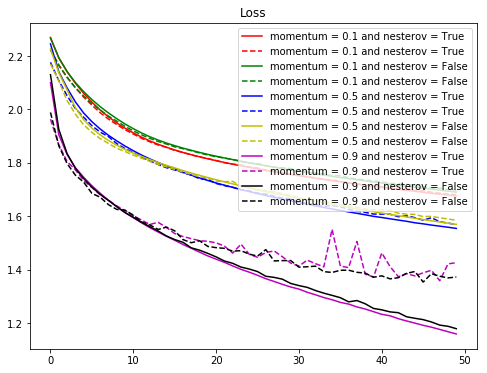

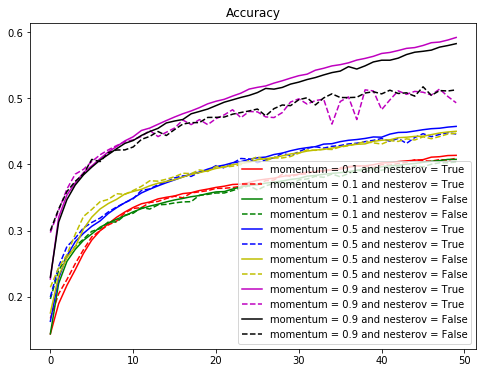

In [7]:
import matplotlib.pyplot as plt
"""
Draw the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## momentum越大,會有更好的結果,但會有較大的震動
## nesterov=True表現較好,但也有較大的震動